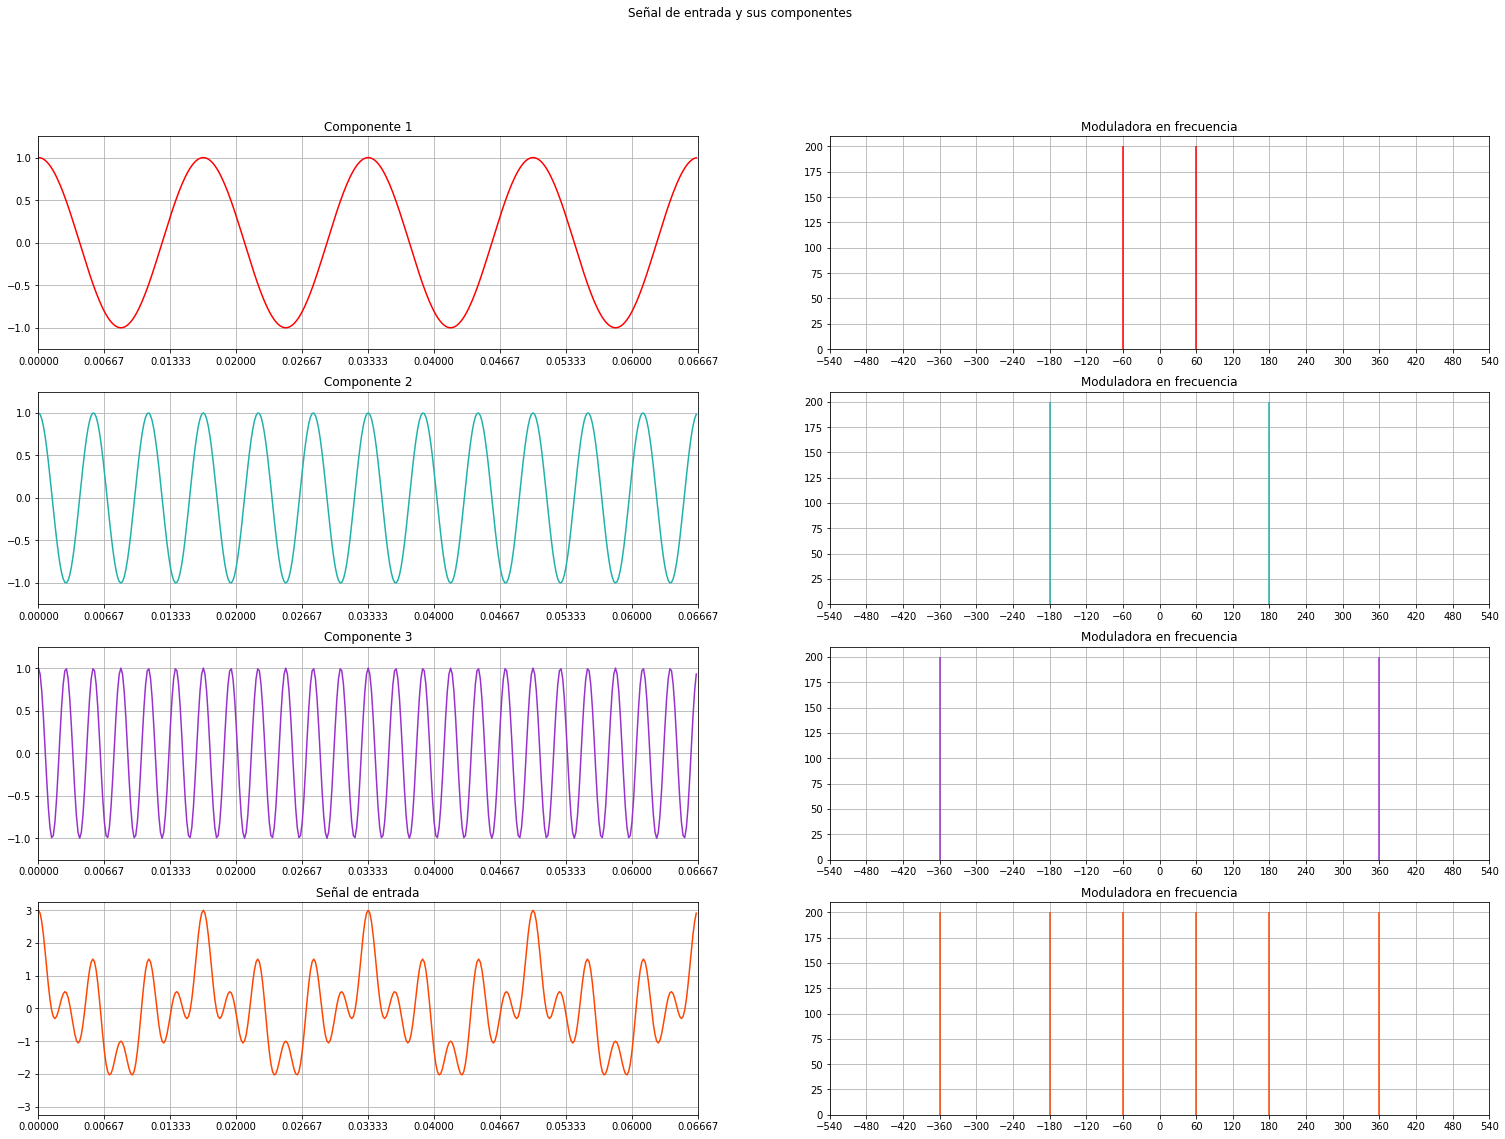

In [45]:
#!python

import numpy as np
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.fft import fft, fftfreq


#------------------------------------------------
# Espacio temporal
#------------------------------------------------
T = 4/60
nsamples = 400
sample_rate = nsamples/T

#Funcion para realizar un FFT de una señal (Usado en la tarea 3)
def plotfft(func):
    F = fft(func)
    tf = fftfreq(nsamples, 1/sample_rate)
    return tf,F

#------------------------------------------------
# Señal de entrada (60Hz, 150Hz, 300Hz)
#------------------------------------------------
t = arange(nsamples) / sample_rate
x1 = cos(2*pi*60*t)
x2 = cos(2*pi*180*t)
x3 = cos(2*pi*360*t)
x = x1 + x2 + x3

#Plot de las señales
fig1, axs = plt.subplots(4,2,figsize=(26,18))
fig1.suptitle('Señal de entrada y sus componentes')

axs[0,0].plot(t,x1,color='red')
axs[0,0].set_title('Componente 1')
axs[0,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[0,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[0,0].grid()

Mtf, M = plotfft(x1)
axs[0,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].set_title('Moduladora en frecuencia')
axs[0,1].grid()

axs[1,0].plot(t,x2,color='lightseagreen')
axs[1,0].set_title('Componente 2')
axs[1,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[1,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1,0].grid()

Mtf, M = plotfft(x2)
axs[1,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[1,1].vlines(Mtf,0,np.abs(M),color='lightseagreen')
axs[1,1].set_title('Moduladora en frecuencia')
axs[1,1].grid()

axs[2,0].plot(t,x3,color='darkorchid')
axs[2,0].set_title('Componente 3')
axs[2,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[2,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[2,0].grid()

Mtf, M = plotfft(x3)
axs[2,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[2,1].vlines(Mtf,0,np.abs(M),color='darkorchid')
axs[2,1].set_title('Moduladora en frecuencia')
axs[2,1].grid()

axs[3,0].plot(t,x,color='orangered')
axs[3,0].set_title('Señal de entrada')
axs[3,0].set(xlim=(0,T),ylim=(-3.25,3.25))
axs[3,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[3,0].grid()

Mtf, M = plotfft(x)
axs[3,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[3,1].vlines(Mtf,0,np.abs(M),color='orangered')
axs[3,1].set_title('Moduladora en frecuencia')
axs[3,1].grid()


plt.show()

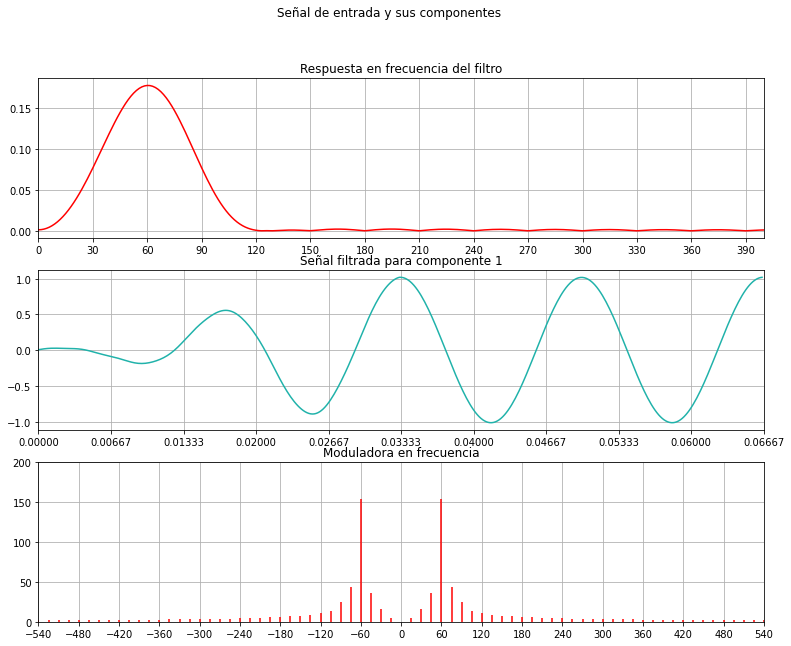

In [39]:
#------------------------------------------------
# Filtro FIR para filtrar componente 1
#------------------------------------------------

def bandpass_firwin(ntaps, lowcut, highcut, fs=sample_rate, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

# Sample rate and desired cutoff frequencies (in Hz).
lowcut = 55
highcut = 65

ntaps = 200
taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x = 5.71*lfilter(taps_hamming, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,400))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 1')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Moduladora en frecuencia')
axs[2].grid()

plt.show()